In [218]:
%matplotlib inline
import numpy as np

In [219]:
import matplotlib.pyplot as plt

In [220]:
import katarchive
import katdal as katfile
import katfile
import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [221]:
def findproj(text):
    found='Unknown'        # default
    chx=text.find('prop')
    if chx >0  :
        pr2=text[chx+11:chx+38].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        if text.find('maser') >0:
            found="Maser monitoring"
            #print text
    return found
c

In [222]:
today=datetime.datetime.today()
ago=datetime.timedelta(-7)
lastweek=today+ago
print today,lastweek
begin=lastweek.strftime(format="%d/%m/%Y")
end=today.strftime(format="%d/%m/%Y")

2015-08-27 12:58:18.036335 2015-08-20 12:58:18.036335


In [223]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2015-08-19T22:00:00Z TO 2015-08-27T21:59:59Z]
Returning 83 results
[['1440669157.h5', '2015-08-27 11:52:43 SAST', 'operator', 204621361], ['1440659794.h5', '2015-08-27 09:16:40 SAST', 'beamformer_tests', 20525850], ['1440657382.h5', '2015-08-27 08:36:27 SAST', 'Sean', 1172594514], ['1440657219.h5', '2015-08-27 08:33:44 SAST', 'operator', 59693739], ['1440619300.h5', '2015-08-26 22:01:48 SAST', 'operator', 178668249], ['1440597786.h5', '2015-08-26 16:03:12 SAST', 'comm_test', 566622092], ['1440597097.h5', '2015-08-26 15:51:42 SAST', 'comm_test', 328266433], ['1440595597.h5', '2015-08-26 15:26:43 SAST', 'comm_test', 323231049], ['1440587705.h5', '2015-08-26 13:15:10 SAST', 'lindsay', 21085340], ['1440587509.h5', '2015-08-26 13:11:53 SAST', 'lindsay', 82642260], ['1440587214.h5', '2015-08-26 13:06:58 SAST', 'comm_test', 89907532], ['1440587131.h5', '2015-08-26 13:05:36 SAST', 'lindsay', 227

In [224]:
f = katarchive.search_archive(startdate=begin)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2015-08-19T22:00:00Z TO 2015-08-27T21:59:59Z]
Returning 83 results


In [225]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()

In [236]:
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    print fi.metadata.ExperimentID, p, fi.metadata.Duration, fi.metadata.Description, len(fi.metadata.Antennas)


20150827-0002 Unknown 86.57 Auto atten 5
20150827-0004 Unknown 35.0 Auto atten 5
20150824-0004 COMM_RFI_SP 2094.17 Basic RFI Scan: RFI SCAN 5
20150827-0001 COMM_Atten 105.01 Auto atten 5
20150826-0006 COMM_Atten 75.5 Auto atten 5
20150826-0005 Unknown 1011.08 Bandpass correction tests 5
20150826-0005 Unknown 585.05 Bandpass correction tests 5
20150826-0005 Unknown 576.05 Bandpass correction tests 5
20150826-0005 COMMTEST 36.0 Auto atten 5
20150826-0005 COMMTEST 146.01 Auto atten 5
20150826-0005 Unknown 159.01 Bandpass correction tests 5
20150826-0005 COMMTEST 39.0 Auto atten 5
20150826-0005 Unknown 158.01 Bandpass correction tests 5
20150826-0005 Unknown 220.02 Bandpass correction tests 5
20150826-0005 Unknown 160.01 Vela beamform test 5
20150826-0005 Unknown 37.0 Auto atten 5
20150826-0005 Unknown 147.01 Bandpass correction tests 5
20150826-0005 Unknown 70.01 Bandpass correction tests 5
20150826-0005 Unknown 72.01 Bandpass correction tests 5
20150826-0005 COMMTEST 146.01 Auto atten 5


Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [227]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    if p == "Unknown":
        p="Maser Monitoring"
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [228]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  72.0 %


In [229]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

20141111IM-01 4.1
20150811-RA 5.76
COMMTEST 9.1
20130822NO-01 10.05
20150821SP-01 7.79
20141014LR-01 13.79
20141002MB-01 3.54
20140527TF-01 4.13
20140624CC-01 15.33
COMM_Image_NO 11.61
20150210SS-01 15.82
COMM_RFI_SP 5.97
COMM_Point_LM 5.05
Maser monitoring 9.02


In [230]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20130822NO-01     10.1 5
20140527TF-01      4.1 5
20140624CC-01     15.3 5
20141002MB-01      3.5 5
20141014LR-01     13.8 5
20141111IM-01      4.1 5
20150210SS-01     15.8 5
20150811-RA        5.8 5
20150821SP-01      7.8 5
COMMTEST           9.1 5
COMM_Image_NO     11.6 5
COMM_Point_LM      5.0 5
COMM_RFI_SP        6.0 5
Maser monitoring   9.0 5


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [231]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

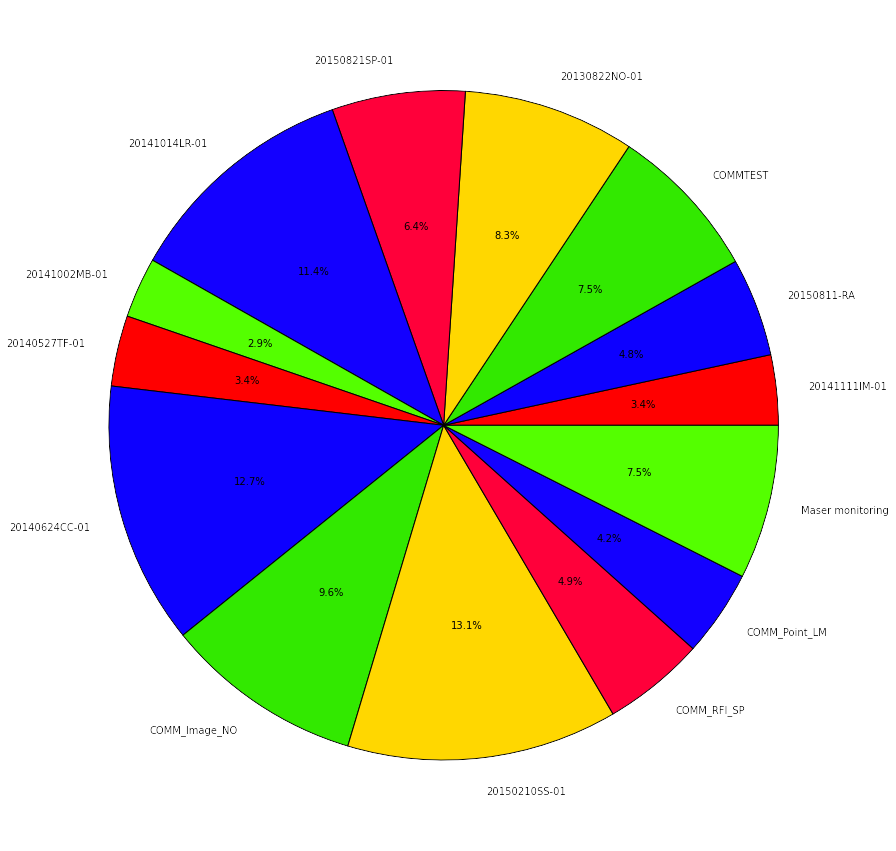

In [232]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [233]:
plt.show()

In [234]:
fi.metadata.InstructionSet

u'/home/kat/scripts/observation/auto_attenuate.py --proposal-id=COMM_Atten --program-block-id=00b60000000 --sb-id-code=20150820-0004 --description= AutoAttenuation for 00b60000000  --observer=operator'